In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 163kB 3.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=2a175f9af5eb5306d431c7f4b1a26007b02b0de4047170326f7026d13634c3e8
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=cff851113de488174a72c69cf769ddb58f729586769db76d9296b191332e88e4
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
basepath = "https://raw.githubusercontent.com/monroews/Plant_Performance/master/"
plants = ['Jesus_de_Otoro','La_Concordia','Moroceli2016','Ithaca_WTP_data_2018']
print(basepath+plants[0]+'.tsv')
pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]
#pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]


https://raw.githubusercontent.com/monroews/Plant_Performance/master/Jesus_de_Otoro.tsv


In [4]:
for i in range(len(plants)):
  print(plants[i])
  print(pddata[i].head(3))

Jesus_de_Otoro
              time  flow (L/s)  raw (NTU)  ...  coag (mg/L) Cl (mg/L)  Temperature
0  12/1/2015 13:39          17       3.12  ...         9.54      0.99           17
1   12/2/2015 6:36          16        3.8  ...        11.75       nan           18
2  12/2/2015 13:30          18        3.2  ...        10.86       0.9           18

[3 rows x 10 columns]
La_Concordia
              time  flow (L/s)   raw (NTU)  ...  backwash  coag (mg/L) Cl (mg/L)
0   8/31/2018 8:00            5       3.26  ...       NaN         5.86      1.57
1   8/31/2018 9:00            5       2.89  ...       NaN         5.86      1.61
2  8/31/2018 10:00            5       2.66  ...       NaN         5.86      1.61

[3 rows x 9 columns]
Moroceli2016
               time  flow (L/s)  raw (NTU)  ...  coag (mg/L)  Cl (mg/L)  Unnamed: 7
0   11/29/2015 6:03       12.03      14.11  ...         13.4       0.56         nan
1   12/5/2015 18:06       12.03       12.4  ...         7.92       0.69         nan
2  12/

In [0]:
font = 'x-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)


Jesus_de_Otoro raw= 940 sed= 940 filter= 940


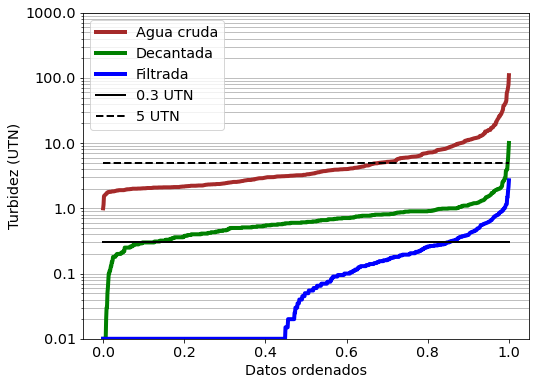

Jesus_de_Otoro Datos de 12/1/2015 13:39 a 12/13/2016 15:30
La_Concordia raw= 2860 sed= 2860 filter= 2860


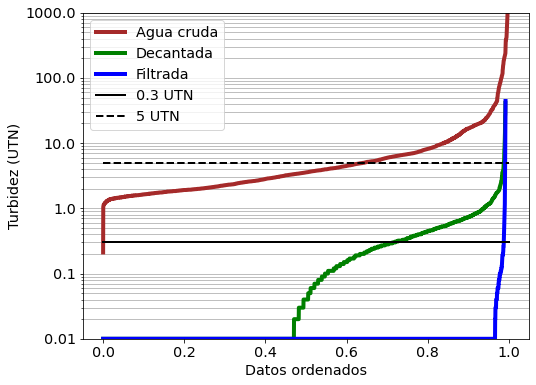

La_Concordia Datos de 8/31/2018 8:00 a 3/3/2019 7:00
Moroceli2016 raw= 1303 sed= 1303 filter= 1303


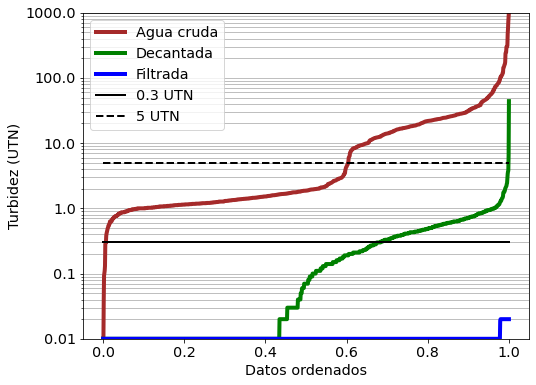

Moroceli2016 Datos de 11/29/2015 6:03 a 11/30/2016 0:00
Ithaca_WTP_data_2018 raw= 365 sed= 365 filter= 365


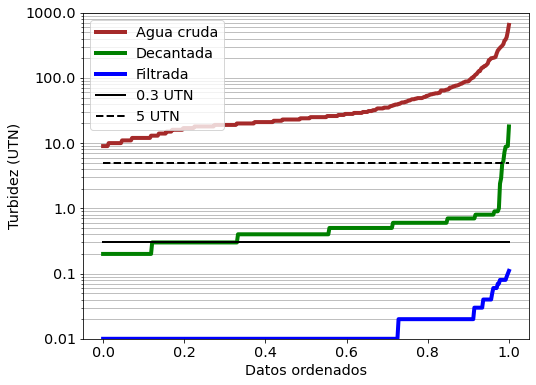

Ithaca_WTP_data_2018 Datos de 1/1/2018 a 12/31/2018


In [20]:
for i in range(len(plants)):
  raw = np.sort(pddata[i]['raw (NTU)']) * u.NTU
  for j in range(len(raw)):
    raw[j]=max(raw[j],0.01*u.NTU)
  sed = np.sort(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sed)):
    sed[j]=max(sed[j],0.01*u.NTU)
  filter = np.sort(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filter)):
    filter[j]=max(filter[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = raw.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  print(plants[i],'raw=',raw.shape[0], 'sed=',sed.shape[0], 'filter=',filter.shape[0])


  plt.plot(rank,raw,linewidth=4, color='brown')
  plt.plot(rank,sed,linewidth=4, color='green')
  plt.plot(rank,filter,linewidth=4, color='blue')
  plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
  plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
  plt.ylabel('Turbidez (UTN)')
  plt.xlabel('Datos ordenados')
  plt.yscale('log')
  plt.ylim(ymin=0.01,ymax=1000)
  plt.grid(which='both',axis='y')
  plt.legend(['Agua cruda','Decantada','Filtrada','0.3 UTN','5 UTN'])
  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
  plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
  plt.show()
  print(plants[i],'Datos de',time[0], 'a', time[-1])



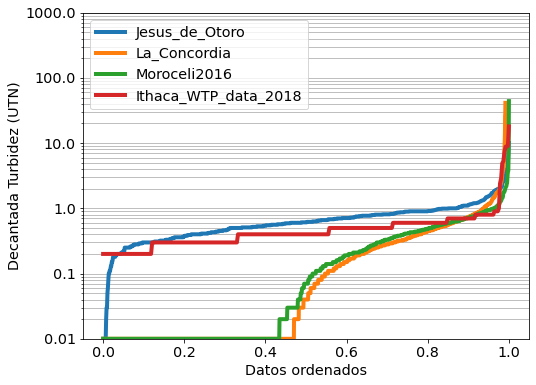

In [21]:
for i in range(len(plants)):
  sed = np.sort(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sed)):
    sed[j]=max(sed[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = sed.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  plt.plot(rank,sed,linewidth=4)

plt.ylabel('Decantada Turbidez (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=1000)
plt.legend(plants)
plt.grid(which='both',axis='y')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()


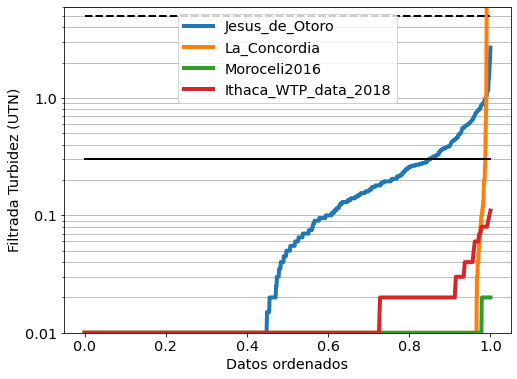

In [22]:
for i in range(len(plants)):
  filter = np.sort(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filter)):
    filter[j]=max(filter[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = filter.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  plt.plot(rank,filter,linewidth=4)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
plt.ylabel('Filtrada Turbidez (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=6)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()